In [41]:
import pandas as pd
from textblob import TextBlob

In [67]:
### Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [42]:
# Load the Twitter dataset from an Excel file (replace 'your_dataset.xlsx' with your file)
excel_file = 'TweetUCC1.xlsx'
df = pd.read_excel(excel_file)

In [43]:
print(df.shape)
df.head()
#Table I. Final data frame collected

(51, 2)


,UCC_Tweets,Sentiment
0,The #UniformCivilCode discourse reflects India...,Positive
1,Comparative analysis of uniform civil codes fr...,Positive
2,The #UCCBill could infringe upon the autonomy ...,Negative
3,The #UCCBill disregards the rich heritage embe...,Negative
4,Positive strides towards gender equality and c...,Positive


In [44]:
df.isnull().sum()

UCC_Tweets    0
Sentiment     0
dtype: int64

Sentiment
Positive    31
Negative    20
dtype: int64


<AxesSubplot:xlabel='Sentiment'>

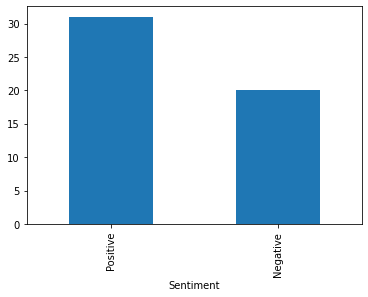

In [45]:
print(df.value_counts('Sentiment'))
df.value_counts('Sentiment').plot(kind='bar')

([<matplotlib.patches.Wedge at 0x190b2aecf70>,
 [Text(-0.3655903556118915, 1.0374698510721025, 'Positive'),
  Text(0.3655904527468272, -1.037469816843059, 'Negative')])

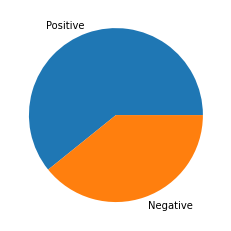

In [80]:
import matplotlib.pyplot as plt
labels = 'Positive', 'Negative',
sizes = [31, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

([<matplotlib.patches.Wedge at 0x190b2a56d30>,
 [Text(-0.1994129212428499, 0.5658926460393287, 'Positive'),
  Text(0.1994129742255421, -0.5658926273689412, 'Negative')],
 [Text(-0.415443585922604, 1.1789430125819347, '60.8%'),
  Text(0.4154436963032127, -1.178942973685294, '39.2%')])

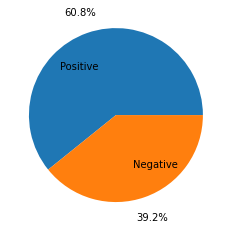

In [81]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)

In [46]:
### Preprocessing Function
ps = PorterStemmer()
corpus = set()
def preprocess(text):
    
    ## removing unwanted space
    text = text.strip()
    
    ## removing html tags 
    text = re.sub("<[^>]*>", "",text)
    
    ## removing any numerical values
    text = re.sub('[^a-zA-Z]', ' ',text)
    
    ## lower case the word
    text = text.lower()
    
    text = text.split()
    
    ## stemming the word for sentiment analysis do not remove the stop word
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [47]:
df['Preprocessed_review'] = df.UCC_Tweets.apply(preprocess)

In [55]:
map_dict = {'Positive':1,
           'Negative':0}
df['sentiment_numeric'] = df.Sentiment.map(map_dict)
df.head()

,UCC_Tweets,Sentiment,Preprocessed_review,sentiment_numeric
0,The #UniformCivilCode discourse reflects India...,Positive,the uniformcivilcod discours reflect india s p...,1
1,Comparative analysis of uniform civil codes fr...,Positive,compar analysi of uniform civil code from arou...,1
2,The #UCCBill could infringe upon the autonomy ...,Negative,the uccbil could infring upon the autonomi of ...,0
3,The #UCCBill disregards the rich heritage embe...,Negative,the uccbil disregard the rich heritag embed in...,0
4,Positive strides towards gender equality and c...,Positive,posit stride toward gender equal and concern a...,1


In [56]:
### performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Preprocessed_review	,
                                                 df.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=df.sentiment_numeric)

In [57]:
x_train.shape,x_test.shape

((40,), (11,))

In [58]:
multi_nb = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('Multi_NB', MultinomialNB())         
])

multi_nb.fit(x_train, y_train)


y_pred_mnb = multi_nb.predict(x_test)

print(f'multi naive bayes precision: {precision_score(y_test,y_pred_mnb)}')
print(f'multi naive bayes accuracy: {accuracy_score(y_test,y_pred_mnb)}')

multi naive bayes precision: 1.0
multi naive bayes accuracy: 1.0


Text(69.0, 0.5, 'Truth')

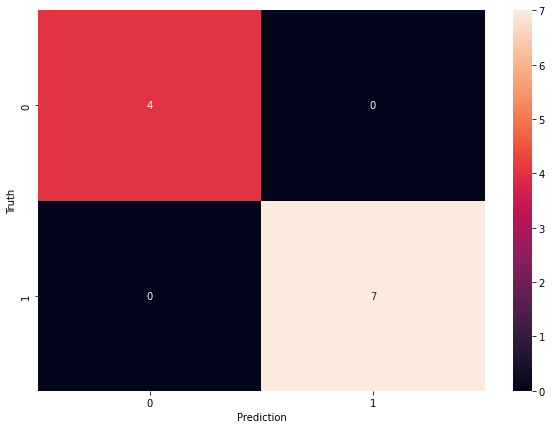

In [59]:
confusion_mat = confusion_matrix(y_test, y_pred_mnb)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')